In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv


<h3>Identifying People's response to the Pfizer Vaccine in Twitter based on the sentiments of each tweet,<br> their subsequent retweets, favorites etc </h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
df_original = pd.read_csv('../input/pfizer-vaccine-tweets/vaccination_tweets.csv')

In [4]:
# creating a copy of the dataframe for editing

In [5]:
df = df_original.copy()

In [6]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [7]:
len(df)

2978

In [8]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [9]:
len(df.columns)

16

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2978 non-null   int64 
 1   user_name         2978 non-null   object
 2   user_location     2365 non-null   object
 3   user_description  2816 non-null   object
 4   user_created      2978 non-null   object
 5   user_followers    2978 non-null   int64 
 6   user_friends      2978 non-null   int64 
 7   user_favourites   2978 non-null   int64 
 8   user_verified     2978 non-null   bool  
 9   date              2978 non-null   object
 10  text              2978 non-null   object
 11  hashtags          2203 non-null   object
 12  source            2977 non-null   object
 13  retweets          2978 non-null   int64 
 14  favorites         2978 non-null   int64 
 15  is_retweet        2978 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 331.7+ KB


analyzing each column

In [11]:
# id is a unique number for each tweet. Numerical non null feature

In [12]:
# to check whther there is any repetitiion of id

In [13]:
np.argmax(np.array(df['id'].value_counts()))

0

In [14]:
df['id'].isnull().sum()

0

In [15]:
# username refers to unique tweeter name of each user. Non null string object

In [16]:
df['user_name'].isnull().sum()

0

In [17]:
np.array(df['user_name'].value_counts())

array([30, 29, 26, ...,  1,  1,  1])

In [18]:
# histogram plot of no of tweets v username 

In [19]:
df['user_name']

0                 Rachel Roh
1                Albert Fong
2                   eli🇱🇹🇪🇺👌
3              Charles Adler
4       Citizen News Channel
                ...         
2973           World Updates
2974               Buttercup
2975            Alex Perkins
2976    Christine Goodfriend
2977               A. Trillm
Name: user_name, Length: 2978, dtype: object

In [20]:
df['user_location'].isnull().sum()

613

In [21]:
user_location_grps = np.array(df['user_location'].value_counts())

In [22]:
user_location_grps[:30]

array([49, 42, 42, 34, 30, 29, 27, 25, 25, 24, 23, 21, 19, 19, 18, 18, 18,
       17, 17, 15, 15, 15, 14, 13, 13, 13, 13, 12, 12, 12])

(array([11.,  7.,  2.,  3.,  3.,  1.,  0.,  0.,  2.,  1.]),
 array([12. , 15.7, 19.4, 23.1, 26.8, 30.5, 34.2, 37.9, 41.6, 45.3, 49. ]),
 <a list of 10 Patch objects>)

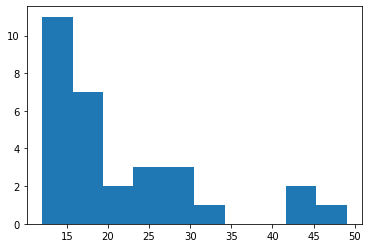

In [23]:
plt.hist(user_location_grps[:30])

In [24]:
df['user_description'].iloc[0]

"Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩\u200d💻"

In [25]:
df['user_description'].isnull().sum()

162

In [26]:
df['user_created'].iloc[0]

'2009-04-08 17:52:46'

In [27]:
df['user_created'].isnull().sum()

0

In [28]:
df['user_followers'].isnull().sum()

0

(array([2.959e+03, 1.100e+01, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([       0. ,  1371492.8,  2742985.6,  4114478.4,  5485971.2,
         6857464. ,  8228956.8,  9600449.6, 10971942.4, 12343435.2,
        13714928. ]),
 <a list of 10 Patch objects>)

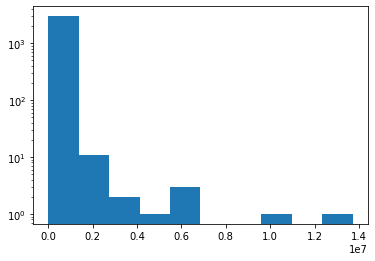

In [29]:

plt.yscale('log')
plt.hist(df['user_followers'])

In [30]:
df['user_verified'].value_counts()

False    2580
True      398
Name: user_verified, dtype: int64

In [31]:
df['source'].value_counts()

Twitter for iPhone                 1028
Twitter Web App                     895
Twitter for Android                 666
TweetDeck                           194
Twitter for iPad                     84
Buffer                               32
Instagram                            19
Hootsuite Inc.                       15
Nonli                                 6
SocialFlow                            5
LinkedIn                              5
Microsoft Power Platform              5
24liveblog                            4
IFTTT                                 2
Echobox                               2
Twitter Media Studio                  2
Twitter for Mac                       2
Twitter Media Studio - LiveCut        1
Publer                                1
Sendible                              1
SocialNewsDesk                        1
EastMojo                              1
GT_Backend                            1
ThreadReaderApp                       1
Falcon Social Media Management        1


In [32]:
df['source']

0       Twitter for Android
1           Twitter Web App
2       Twitter for Android
3           Twitter Web App
4        Twitter for iPhone
               ...         
2973     Twitter for iPhone
2974     Twitter for iPhone
2975     Twitter for iPhone
2976     Twitter for iPhone
2977    Twitter for Android
Name: source, Length: 2978, dtype: object

In [33]:
df['source'].isnull().sum()

1

In [34]:
df['user_favourites'].isnull().sum()

0

In [35]:
type(df['date'].iloc[0])

str

In [36]:
type(df['text'].iloc[0])

str

In [37]:
df['hashtags'].iloc[2]

"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']"

In [38]:
df['hashtags'].isnull().sum()

775

In [39]:
type(df['source'].iloc[0])

str

(array([2.963e+03, 8.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  44.6,  89.2, 133.8, 178.4, 223. , 267.6, 312.2, 356.8,
        401.4, 446. ]),
 <a list of 10 Patch objects>)

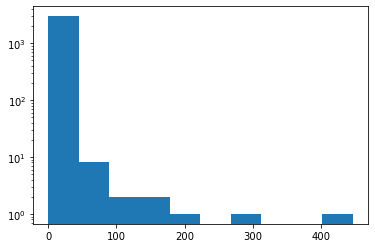

In [40]:
plt.yscale('log')
plt.hist(df['retweets'])

In [41]:
df['favorites'].isnull().sum()

0

(array([2.959e+03, 8.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([   0. ,  212.9,  425.8,  638.7,  851.6, 1064.5, 1277.4, 1490.3,
        1703.2, 1916.1, 2129. ]),
 <a list of 10 Patch objects>)

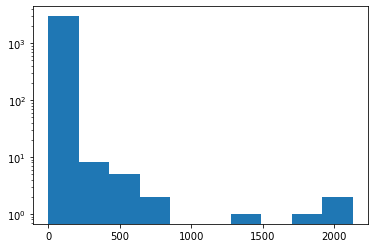

In [42]:
plt.yscale('log')
plt.hist(df['favorites'])

In [43]:
df['is_retweet'].value_counts()

False    2978
Name: is_retweet, dtype: int64

In [44]:
# decide what to do with null values in -
# - user_location ------->  nan
# - user_description ------> nan
# - hashtags  -----> empty string or nan
# - source    -----> Add it to be NaN

In [45]:
df['user_location'].iloc[4]

nan

In [46]:
df['user_description'].iloc[46]

nan

In [47]:
df['hashtags'].iloc[1]

nan

In [48]:
# sentiment identification using VADER

In [49]:
# remove tagging from text
# remove @ and add a 'to' column
# remove URLs from the text

In [50]:
sentiments = df['text']

In [51]:
# removing links from the tweets

In [52]:
import re

In [53]:
def remove_links(dataframe):
    sentiments = []
    for row in dataframe.iterrows():
        x = row[1][10]
        y = re.sub(r'http\S+', '', x)
        sentiments.append(y)
    
    return np.array(sentiments)

In [54]:
sentiments = remove_links(df)

In [55]:
sentiments.shape

(2978,)

In [56]:
sentiments[:10]

array(['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech ',
       "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… ",
       '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… ',
       "Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… ",
       'Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… ',
       'Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… ',
       'it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… ',
       'There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris winning #Election2020… ',
       'Covid vaccine; You getting it?

In [57]:
sentiments = pd.DataFrame(sentiments,columns=['text'])

In [58]:
import nltk

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [60]:
sid = SentimentIntensityAnalyzer()

In [61]:
sentiments.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [62]:
sentiments['scores'] = sentiments['text'].apply(lambda text: sid.polarity_scores(text))

sentiments['compound']  = sentiments['scores'].apply(lambda score_dict: score_dict['compound'])

sentiments['comp_score'] = sentiments['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

sentiments.head()

,text,scores,compound,comp_score
0,Same folks said daikon paste could treat a cyt...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.4019,pos
1,While the world has been on the wrong side of ...,"{'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'com...",-0.1027,neg
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.2500,pos
3,"Facts are immutable, Senator, even when you're...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,Explain to me again why we need a vaccine @Bor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [63]:
sentiments['text'].iloc[1]

"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… "

In [64]:
sentiments['comp_score'].value_counts()

pos    2467
neg     511
Name: comp_score, dtype: int64

In [65]:
# as the number of positive tweets is much higher than negative tweets it is safe to assume that Pfizer vaccine is getting a +ve reception 

In [66]:
# identifying tweet popularity

In [67]:
# remove is_retweet columm
# remove source column
# remove user location and description ?
# remove id ?
# from user created extract age of account
# change date to 3 columns day,month,year
# remove text
# add sentiment

In [68]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [69]:
# dropping text, is_retweet, user_description

In [70]:
df.drop(['text','is_retweet','user_description'],axis = 1,inplace=True)

In [71]:
df

,id,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,retweets,favorites
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,0,0
1,1338158543359250433,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,NaN,Twitter Web App,1,1
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,NaN,Twitter Web App,446,2129
4,1337854064604966912,Citizen News Channel,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,1345499298151198720,World Updates,Everywhere,2021-01-02 22:28:50,16,121,0,False,2021-01-02 22:36:45,['PfizerBioNTech'],Twitter for iPhone,0,0
2974,1345495086201671680,Buttercup,Earth,2018-04-17 03:48:35,22,90,2779,False,2021-01-02 22:20:01,"['PfizerBioNTech', 'vaccine']",Twitter for iPhone,0,2
2975,1345493500951994368,Alex Perkins,Canterbury,2009-02-05 11:27:29,1966,1192,4617,False,2021-01-02 22:13:43,NaN,Twitter for iPhone,0,2
2976,1345491609975046145,Christine Goodfriend,NaN,2013-05-06 03:26:53,904,985,12118,False,2021-01-02 22:06:12,"['vaccine', 'PfizerBioNTech']",Twitter for iPhone,0,1


In [72]:
np.array(df['source'].value_counts())[16]

2

In [73]:
df['source'].value_counts()

Twitter for iPhone                 1028
Twitter Web App                     895
Twitter for Android                 666
TweetDeck                           194
Twitter for iPad                     84
Buffer                               32
Instagram                            19
Hootsuite Inc.                       15
Nonli                                 6
SocialFlow                            5
LinkedIn                              5
Microsoft Power Platform              5
24liveblog                            4
IFTTT                                 2
Echobox                               2
Twitter Media Studio                  2
Twitter for Mac                       2
Twitter Media Studio - LiveCut        1
Publer                                1
Sendible                              1
SocialNewsDesk                        1
EastMojo                              1
GT_Backend                            1
ThreadReaderApp                       1
Falcon Social Media Management        1


In [74]:
def change_source_others(dataframe):
    source_less_categories = []
    for row in dataframe.iterrows():
        if row[1][10] == 'Twitter for iPhone':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Twitter for Android':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Twitter Web App':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Twitter for Android ':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Twitter for Android':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'TweetDeck':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Twitter for iPad':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Buffer':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Instagram':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Hootsuite Inc.':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Nonli':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'SocialFlow':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'Microsoft Power Platform':
            source_less_categories.append(row[1][10])
        elif row[1][10] == 'LinkedIn':
            source_less_categories.append(row[1][10])
        elif row[1][10] == '24liveblog':
            source_less_categories.append(row[1][10])
        else:
            source_less_categories.append('others')
    
    
    return np.array(source_less_categories)

In [75]:
source_less_categories = change_source_others(df)

In [76]:
source_less_categories = pd.DataFrame(source_less_categories,columns=['source_less_categories'])

In [77]:
source_less_categories.value_counts()

source_less_categories  
Twitter for iPhone          1028
Twitter Web App              895
Twitter for Android          666
TweetDeck                    194
Twitter for iPad              84
Buffer                        32
others                        20
Instagram                     19
Hootsuite Inc.                15
Nonli                          6
SocialFlow                     5
Microsoft Power Platform       5
LinkedIn                       5
24liveblog                     4
dtype: int64

In [78]:
df['source_less_categores'] = pd.DataFrame(source_less_categories)

In [79]:
df.head()

,id,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,retweets,favorites,source_less_categores
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,['PfizerBioNTech'],Twitter for Android,0,0,Twitter for Android
1,1338158543359250433,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,NaN,Twitter Web App,1,1,Twitter Web App
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,Twitter for Android
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,NaN,Twitter Web App,446,2129,Twitter Web App
4,1337854064604966912,Citizen News Channel,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,Twitter for iPhone


In [80]:
df.drop(['source'],axis = 1, inplace = True)

In [81]:
df.head()

,id,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,retweets,favorites,source_less_categores
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,['PfizerBioNTech'],0,0,Twitter for Android
1,1338158543359250433,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,NaN,1,1,Twitter Web App
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,Twitter for Android
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,NaN,446,2129,Twitter Web App
4,1337854064604966912,Citizen News Channel,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,Twitter for iPhone


In [82]:
df['source_less_categores'].isnull().sum()

0

In [83]:
# age of the account

In [84]:
from datetime import datetime

In [85]:
match = re.search(r'\d{4}',df['user_created'].iloc[0])

In [86]:
date = datetime.strptime(match.group(),'%Y')

In [87]:
date.year

2009

In [88]:
datetime.now().year - date.year

12

In [89]:
df.head()

,id,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,retweets,favorites,source_less_categores
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,['PfizerBioNTech'],0,0,Twitter for Android
1,1338158543359250433,Albert Fong,"San Francisco, CA",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,NaN,1,1,Twitter Web App
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,Twitter for Android
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,NaN,446,2129,Twitter Web App
4,1337854064604966912,Citizen News Channel,NaN,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,Twitter for iPhone


In [90]:
def age_of_account(dataframe):
    
    dates = []
    now  = datetime.now().year
    
    for row in dataframe.iterrows():
        
        date = re.search(r'\d{4}',row[1][3])
        year = datetime.strptime(date.group(),'%Y')
        dates.append(now - year.year)
    
    return np.array(dates)
    

In [91]:
age_account = age_of_account(df)

In [92]:
age_account[:10]

array([12, 12,  1, 13,  1,  1,  8,  2, 12,  9])

In [93]:
df.drop(['user_created'],axis = 1,inplace=True)

In [94]:
df['age_account'] = pd.DataFrame(age_account)

In [95]:
df.head()

,id,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,hashtags,retweets,favorites,source_less_categores,age_account
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,['PfizerBioNTech'],0,0,Twitter for Android,12
1,1338158543359250433,Albert Fong,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,NaN,1,1,Twitter Web App,12
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,10,88,155,False,2020-12-12 20:33:45,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,Twitter for Android,1
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",49165,3933,21853,True,2020-12-12 20:23:59,NaN,446,2129,Twitter Web App,13
4,1337854064604966912,Citizen News Channel,NaN,152,580,1473,False,2020-12-12 20:17:19,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,Twitter for iPhone,1


In [96]:
# remove hashtags

In [97]:
df.drop(['hashtags'],inplace = True,axis = 1)

In [98]:
df.head()

,id,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,retweets,favorites,source_less_categores,age_account
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,0,0,Twitter for Android,12
1,1338158543359250433,Albert Fong,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,1,1,Twitter Web App,12
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,10,88,155,False,2020-12-12 20:33:45,0,0,Twitter for Android,1
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada",49165,3933,21853,True,2020-12-12 20:23:59,446,2129,Twitter Web App,13
4,1337854064604966912,Citizen News Channel,NaN,152,580,1473,False,2020-12-12 20:17:19,0,0,Twitter for iPhone,1


In [99]:
# dropping user location

In [100]:
df['user_location'].value_counts()

India                             49
London, England                   42
United Arab Emirates              42
United Kingdom                    34
Email:talksavailable@gmail.com    30
                                  ..
Kent, East Sussex and London       1
Shanghai Hongkong                  1
Pisa, Toscana                      1
Troy, Michigan;  Serial ✈️         1
Gurgaon, India                     1
Name: user_location, Length: 1005, dtype: int64

In [101]:
df.drop(['user_location'],inplace=True,axis = 1)

In [102]:
df.head()

,id,user_name,user_followers,user_friends,user_favourites,user_verified,date,retweets,favorites,source_less_categores,age_account
0,1340539111971516416,Rachel Roh,405,1692,3247,False,2020-12-20 06:06:44,0,0,Twitter for Android,12
1,1338158543359250433,Albert Fong,834,666,178,False,2020-12-13 16:27:13,1,1,Twitter Web App,12
2,1337858199140118533,eli🇱🇹🇪🇺👌,10,88,155,False,2020-12-12 20:33:45,0,0,Twitter for Android,1
3,1337855739918835717,Charles Adler,49165,3933,21853,True,2020-12-12 20:23:59,446,2129,Twitter Web App,13
4,1337854064604966912,Citizen News Channel,152,580,1473,False,2020-12-12 20:17:19,0,0,Twitter for iPhone,1


In [103]:
df.drop(['user_name'],inplace=True,axis = 1)

In [104]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,date,retweets,favorites,source_less_categores,age_account
0,1340539111971516416,405,1692,3247,False,2020-12-20 06:06:44,0,0,Twitter for Android,12
1,1338158543359250433,834,666,178,False,2020-12-13 16:27:13,1,1,Twitter Web App,12
2,1337858199140118533,10,88,155,False,2020-12-12 20:33:45,0,0,Twitter for Android,1
3,1337855739918835717,49165,3933,21853,True,2020-12-12 20:23:59,446,2129,Twitter Web App,13
4,1337854064604966912,152,580,1473,False,2020-12-12 20:17:19,0,0,Twitter for iPhone,1


In [105]:
df['date']

0       2020-12-20 06:06:44
1       2020-12-13 16:27:13
2       2020-12-12 20:33:45
3       2020-12-12 20:23:59
4       2020-12-12 20:17:19
               ...         
2973    2021-01-02 22:36:45
2974    2021-01-02 22:20:01
2975    2021-01-02 22:13:43
2976    2021-01-02 22:06:12
2977    2021-01-02 21:35:21
Name: date, Length: 2978, dtype: object

In [106]:
df['date'] = pd.to_datetime(df['date'])

In [107]:
base_date = df.sort_values(by = 'date').iloc[0][5]

In [108]:
no_hrs = df.sort_values(by = 'date').iloc[2][5] - base_date

In [109]:
no_hrs.min

Timedelta('-106752 days +00:12:43.145224193')

In [110]:
df.sort_values(by = 'date').iloc[2][5]

Timestamp('2020-12-12 12:12:35')

In [111]:
base_date

Timestamp('2020-12-12 11:55:28')

In [112]:
diff = df['date'].iloc[1] - base_date

In [113]:
diff.total_seconds()/ 360

285.2916666666667

In [114]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,date,retweets,favorites,source_less_categores,age_account
0,1340539111971516416,405,1692,3247,False,2020-12-20 06:06:44,0,0,Twitter for Android,12
1,1338158543359250433,834,666,178,False,2020-12-13 16:27:13,1,1,Twitter Web App,12
2,1337858199140118533,10,88,155,False,2020-12-12 20:33:45,0,0,Twitter for Android,1
3,1337855739918835717,49165,3933,21853,True,2020-12-12 20:23:59,446,2129,Twitter Web App,13
4,1337854064604966912,152,580,1473,False,2020-12-12 20:17:19,0,0,Twitter for iPhone,1


In [115]:
def total_hours(dataframe):
    
    hrs = []
    base_date = df.sort_values(by = 'date').iloc[0][5]
    
    for row in dataframe.iterrows():
        diff = row[1][5] - base_date
        hrs.append(int(diff.total_seconds()/ 360))
    
    return np.array(hrs)

In [116]:
total_hrs = total_hours(df)

In [117]:
df['total_hrs'] = pd.DataFrame(total_hrs)

In [118]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,date,retweets,favorites,source_less_categores,age_account,total_hrs
0,1340539111971516416,405,1692,3247,False,2020-12-20 06:06:44,0,0,Twitter for Android,12,1861
1,1338158543359250433,834,666,178,False,2020-12-13 16:27:13,1,1,Twitter Web App,12,285
2,1337858199140118533,10,88,155,False,2020-12-12 20:33:45,0,0,Twitter for Android,1,86
3,1337855739918835717,49165,3933,21853,True,2020-12-12 20:23:59,446,2129,Twitter Web App,13,84
4,1337854064604966912,152,580,1473,False,2020-12-12 20:17:19,0,0,Twitter for iPhone,1,83


In [119]:
df.drop(['date'],axis = 1,inplace = True)

In [120]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,source_less_categores,age_account,total_hrs
0,1340539111971516416,405,1692,3247,False,0,0,Twitter for Android,12,1861
1,1338158543359250433,834,666,178,False,1,1,Twitter Web App,12,285
2,1337858199140118533,10,88,155,False,0,0,Twitter for Android,1,86
3,1337855739918835717,49165,3933,21853,True,446,2129,Twitter Web App,13,84
4,1337854064604966912,152,580,1473,False,0,0,Twitter for iPhone,1,83


In [121]:
# categorical label encoding source feature

In [122]:
from sklearn.preprocessing import OrdinalEncoder

In [123]:
df[df['source_less_categores'].isnull()==True]

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,source_less_categores,age_account,total_hrs


In [124]:
df.iloc[1838]

id                       1344269125011562498
user_followers                            84
user_friends                               1
user_favourites                           20
user_verified                          False
retweets                                   0
favorites                                  0
source_less_categores                 others
age_account                                1
total_hrs                               4332
Name: 1838, dtype: object

In [125]:
source_values = df['source_less_categores'].values.reshape(-1,1)

In [126]:
source_values.shape

(2978, 1)

In [127]:
source_values[:10]

array([['Twitter for Android'],
       ['Twitter Web App'],
       ['Twitter for Android'],
       ['Twitter Web App'],
       ['Twitter for iPhone'],
       ['Twitter for iPhone'],
       ['Twitter Web App'],
       ['Twitter for iPhone'],
       ['Twitter Web App'],
       ['Twitter Web App']], dtype=object)

In [128]:
ordinal_encoder = OrdinalEncoder()

In [129]:
encoded_source = ordinal_encoder.fit_transform(source_values)

In [130]:
encoded_source[:10]

array([[10.],
       [ 9.],
       [10.],
       [ 9.],
       [12.],
       [12.],
       [ 9.],
       [12.],
       [ 9.],
       [ 9.]])

In [131]:
df['label_encoded_source'] = pd.DataFrame(encoded_source)

In [132]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,source_less_categores,age_account,total_hrs,label_encoded_source
0,1340539111971516416,405,1692,3247,False,0,0,Twitter for Android,12,1861,10.0
1,1338158543359250433,834,666,178,False,1,1,Twitter Web App,12,285,9.0
2,1337858199140118533,10,88,155,False,0,0,Twitter for Android,1,86,10.0
3,1337855739918835717,49165,3933,21853,True,446,2129,Twitter Web App,13,84,9.0
4,1337854064604966912,152,580,1473,False,0,0,Twitter for iPhone,1,83,12.0


In [133]:
df['label_encoded_source'].value_counts()

12.0    1028
9.0      895
10.0     666
8.0      194
11.0      84
1.0       32
13.0      20
3.0       19
2.0       15
6.0        6
5.0        5
4.0        5
7.0        5
0.0        4
Name: label_encoded_source, dtype: int64

In [134]:
df.drop(['source_less_categores'], inplace = True, axis = 1)

In [135]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,age_account,total_hrs,label_encoded_source
0,1340539111971516416,405,1692,3247,False,0,0,12,1861,10.0
1,1338158543359250433,834,666,178,False,1,1,12,285,9.0
2,1337858199140118533,10,88,155,False,0,0,1,86,10.0
3,1337855739918835717,49165,3933,21853,True,446,2129,13,84,9.0
4,1337854064604966912,152,580,1473,False,0,0,1,83,12.0


In [136]:
# one hot encoding of source feature

In [137]:
from sklearn.preprocessing import OneHotEncoder

In [138]:
one_hot_encoder = OneHotEncoder()

In [139]:
one_hot_encoded_source = one_hot_encoder.fit_transform(df['label_encoded_source'].values.reshape(-1,1))

In [140]:
one_hot_encoded_source[:10]

<10x14 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [141]:
df.drop(['label_encoded_source'], inplace = True, axis = 1)

In [142]:
df['one_hot_encoded_source'] = pd.DataFrame(one_hot_encoded_source)

In [143]:
one_hot_encoded_source.shape

(2978, 14)

In [144]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,age_account,total_hrs,one_hot_encoded_source
0,1340539111971516416,405,1692,3247,False,0,0,12,1861,"(0, 10)\t1.0"
1,1338158543359250433,834,666,178,False,1,1,12,285,"(0, 9)\t1.0"
2,1337858199140118533,10,88,155,False,0,0,1,86,"(0, 10)\t1.0"
3,1337855739918835717,49165,3933,21853,True,446,2129,13,84,"(0, 9)\t1.0"
4,1337854064604966912,152,580,1473,False,0,0,1,83,"(0, 12)\t1.0"


In [145]:
one_hot_encoded_source

<2978x14 sparse matrix of type '<class 'numpy.float64'>'
	with 2978 stored elements in Compressed Sparse Row format>

In [146]:
source_less_categories.value_counts()

source_less_categories  
Twitter for iPhone          1028
Twitter Web App              895
Twitter for Android          666
TweetDeck                    194
Twitter for iPad              84
Buffer                        32
others                        20
Instagram                     19
Hootsuite Inc.                15
Nonli                          6
SocialFlow                     5
Microsoft Power Platform       5
LinkedIn                       5
24liveblog                     4
dtype: int64

In [147]:
df['source_iphone'] = pd.DataFrame(one_hot_encoded_source[:,0].A)
df['source_web_app'] = pd.DataFrame(one_hot_encoded_source[:,1].A)
df['source_android'] = pd.DataFrame(one_hot_encoded_source[:,2].A)
df['source_tweetdeck'] = pd.DataFrame(one_hot_encoded_source[:,3].A)
df['source_ipad'] = pd.DataFrame(one_hot_encoded_source[:,4].A)
df['source_buffer'] = pd.DataFrame(one_hot_encoded_source[:,5].A)
df['source_others'] = pd.DataFrame(one_hot_encoded_source[:,6].A)
df['source_instagram'] = pd.DataFrame(one_hot_encoded_source[:,7].A)
df['source_hootsuite'] = pd.DataFrame(one_hot_encoded_source[:,8].A)
df['source_nonli'] = pd.DataFrame(one_hot_encoded_source[:,9].A)
df['source_socialflow'] = pd.DataFrame(one_hot_encoded_source[:,10].A)
df['source_microsoft'] = pd.DataFrame(one_hot_encoded_source[:,11].A)
df['source_linkedin'] = pd.DataFrame(one_hot_encoded_source[:,12].A)
df['source_24liveblog'] = pd.DataFrame(one_hot_encoded_source[:,13].A)

In [148]:
#df.drop(['source_iphone','source_web_app','source_android','source_tweetdeck','source_ipad','source_buffer','source_others','source_instagram','source_hootsuite','source_nonli','source_socialflow','source_microsoft','source_linkedin','source_24liveblog'],inplace = True, axis =1 )

In [149]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,age_account,total_hrs,one_hot_encoded_source,...,source_ipad,source_buffer,source_others,source_instagram,source_hootsuite,source_nonli,source_socialflow,source_microsoft,source_linkedin,source_24liveblog
0,1340539111971516416,405,1692,3247,False,0,0,12,1861,"(0, 10)\t1.0",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1338158543359250433,834,666,178,False,1,1,12,285,"(0, 9)\t1.0",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1337858199140118533,10,88,155,False,0,0,1,86,"(0, 10)\t1.0",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1337855739918835717,49165,3933,21853,True,446,2129,13,84,"(0, 9)\t1.0",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1337854064604966912,152,580,1473,False,0,0,1,83,"(0, 12)\t1.0",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [150]:
df.drop(['one_hot_encoded_source'],inplace = True , axis = 1)

In [151]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,age_account,total_hrs,source_iphone,...,source_ipad,source_buffer,source_others,source_instagram,source_hootsuite,source_nonli,source_socialflow,source_microsoft,source_linkedin,source_24liveblog
0,1340539111971516416,405,1692,3247,False,0,0,12,1861,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1338158543359250433,834,666,178,False,1,1,12,285,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1337858199140118533,10,88,155,False,0,0,1,86,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1337855739918835717,49165,3933,21853,True,446,2129,13,84,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1337854064604966912,152,580,1473,False,0,0,1,83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [152]:
df.columns

Index(['id', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'retweets', 'favorites', 'age_account', 'total_hrs',
       'source_iphone', 'source_web_app', 'source_android', 'source_tweetdeck',
       'source_ipad', 'source_buffer', 'source_others', 'source_instagram',
       'source_hootsuite', 'source_nonli', 'source_socialflow',
       'source_microsoft', 'source_linkedin', 'source_24liveblog'],
      dtype='object')

In [153]:
one_hot_encoded_source[:,13].shape

(2978, 1)

In [154]:
# perform standard scaling

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
std_scalar = StandardScaler()

In [157]:
#df_num.head()

In [158]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,age_account,total_hrs,source_iphone,...,source_ipad,source_buffer,source_others,source_instagram,source_hootsuite,source_nonli,source_socialflow,source_microsoft,source_linkedin,source_24liveblog
0,1340539111971516416,405,1692,3247,False,0,0,12,1861,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1338158543359250433,834,666,178,False,1,1,12,285,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1337858199140118533,10,88,155,False,0,0,1,86,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1337855739918835717,49165,3933,21853,True,446,2129,13,84,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1337854064604966912,152,580,1473,False,0,0,1,83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [159]:
df_num = df.drop(['user_verified','source_iphone','source_web_app','source_android','source_tweetdeck','source_ipad','source_buffer','source_others','source_instagram','source_hootsuite','source_nonli','source_socialflow','source_microsoft','source_linkedin','source_24liveblog','id'], axis = 1)

In [160]:
df_num.head()

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs
0,405,1692,3247,0,0,12,1861
1,834,666,178,1,1,12,285
2,10,88,155,0,0,1,86
3,49165,3933,21853,446,2129,13,84
4,152,580,1473,0,0,1,83


In [161]:
df_num = std_scalar.fit_transform(df_num)

In [162]:
#df_num.head()

In [163]:
df.head()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,age_account,total_hrs,source_iphone,...,source_ipad,source_buffer,source_others,source_instagram,source_hootsuite,source_nonli,source_socialflow,source_microsoft,source_linkedin,source_24liveblog
0,1340539111971516416,405,1692,3247,False,0,0,12,1861,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1338158543359250433,834,666,178,False,1,1,12,285,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1337858199140118533,10,88,155,False,0,0,1,86,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1337855739918835717,49165,3933,21853,True,446,2129,13,84,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1337854064604966912,152,580,1473,False,0,0,1,83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [164]:
df.drop(['user_followers','user_friends','user_favourites','retweets','favorites','age_account','total_hrs'],inplace = True, axis = 1)

In [165]:
df.head()

,id,user_verified,source_iphone,source_web_app,source_android,source_tweetdeck,source_ipad,source_buffer,source_others,source_instagram,source_hootsuite,source_nonli,source_socialflow,source_microsoft,source_linkedin,source_24liveblog
0,1340539111971516416,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1338158543359250433,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1337858199140118533,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1337855739918835717,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1337854064604966912,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
df_num.shape

(2978, 7)

In [167]:
df_num = pd.DataFrame(data = df_num,columns = ['user_followers','user_friends','user_favourites','retweets','favorites','age_account','total_hrs'])

In [168]:
df = df.join(df_num)

In [169]:
df.head()

,id,user_verified,source_iphone,source_web_app,source_android,source_tweetdeck,source_ipad,source_buffer,source_others,source_instagram,...,source_microsoft,source_linkedin,source_24liveblog,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs
0,1340539111971516416,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161
1,1338158543359250433,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773
2,1337858199140118533,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395
3,1337855739918835717,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316
4,1337854064604966912,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777


In [170]:
# performing unsupervised learning

In [172]:
X = df.drop(['id'],axis = 1).values

In [173]:
X.shape

(2978, 22)

In [174]:
from sklearn.cluster import KMeans

In [175]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [176]:
kmeans.cluster_centers_

array([[ 1.32481506e-01,  1.34498991e-03,  1.07599193e-02,
         5.04371217e-03,  6.38870208e-03,  1.68123739e-03,
         1.68123739e-03,  2.01748487e-03,  1.68123739e-03,
         6.52320108e-02,  3.00268998e-01,  2.23940820e-01,
         2.82447882e-02,  3.44989913e-01,  6.72494956e-03,
        -3.18617509e-04, -5.37443964e-04, -2.40000513e-04,
        -2.67612713e-02, -3.18286626e-02, -1.34810338e-03,
         6.35538583e-04],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         2.36892118e-01,  3.99589587e-01,  1.78440382e-01,
         1.98970052e+01,  2.36646107e+01,  1.00231487e+00,
        -4.72522936e-01]])

In [177]:
y = kmeans.labels_

In [178]:
y.shape

(2978,)

In [179]:
df['popularity'] = pd.DataFrame(y)

In [180]:
df.head()

,id,user_verified,source_iphone,source_web_app,source_android,source_tweetdeck,source_ipad,source_buffer,source_others,source_instagram,...,source_linkedin,source_24liveblog,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,popularity
0,1340539111971516416,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,0
1,1338158543359250433,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,0
2,1337858199140118533,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,0
3,1337855739918835717,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,1
4,1337854064604966912,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,0


In [181]:
df['sentiment'] = sentiments['comp_score']

In [182]:
df.head()

,id,user_verified,source_iphone,source_web_app,source_android,source_tweetdeck,source_ipad,source_buffer,source_others,source_instagram,...,source_24liveblog,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,popularity,sentiment
0,1340539111971516416,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,0,pos
1,1338158543359250433,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,0,neg
2,1337858199140118533,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,0,pos
3,1337855739918835717,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,1,pos
4,1337854064604966912,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,0,pos


In [183]:
df['popularity'].value_counts()

0    2974
1       4
Name: popularity, dtype: int64

In [184]:
def count_popularity(dataframe):
    
    pos_pop = 0
    neg_pop = 0
    for row in dataframe.iterrows():
        if row[1][23] == 1 and row[1][24] == 'pos':
            pos_pop+=1
        if row[1][23] == 1 and row[1][24] == 'neg':
            neg_pop+=1
        
    return pos_pop,neg_pop

In [185]:
pos,neg = count_popularity(df)

In [186]:
pos,neg

(4, 0)

In [187]:
df['sentiment'].value_counts()

pos    2467
neg     511
Name: sentiment, dtype: int64

In [188]:
pos_ratio = 4/2467
neg_ratio = 0/511

In [189]:
pos_ratio,neg_ratio

(0.0016214025131738954, 0.0)

In [190]:
# analyzing without source feature

In [191]:
df.head()

,id,user_verified,source_iphone,source_web_app,source_android,source_tweetdeck,source_ipad,source_buffer,source_others,source_instagram,...,source_24liveblog,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,popularity,sentiment
0,1340539111971516416,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,0,pos
1,1338158543359250433,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,0,neg
2,1337858199140118533,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,0,pos
3,1337855739918835717,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,1,pos
4,1337854064604966912,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,0,pos


In [192]:
df_num.head()

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs
0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161
1,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773
2,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395
3,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316
4,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777


In [193]:
df_num = df_num.join(df['user_verified'])

In [194]:
df_num.head()

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,user_verified
0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,False
1,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,False
2,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,False
3,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,True
4,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,False


In [195]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_num.values)

In [196]:
y = kmeans.labels_

In [197]:
len(y)

2978

In [198]:
y.shape

(2978,)

In [200]:
df_num['popularity'] = pd.DataFrame(y)

In [201]:
df_num.head()

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,user_verified,popularity
0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,False,0
1,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,False,0
2,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,False,0
3,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,True,1
4,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,False,0


In [203]:
df_num['popularity'].value_counts()

0    2971
1       7
Name: popularity, dtype: int64

In [208]:
df_num['sentiment'] = pd.DataFrame(sentiments['comp_score'].values)

In [209]:
df_num.head()

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,user_verified,popularity,sentiment
0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,False,0,pos
1,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,False,0,neg
2,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,False,0,pos
3,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,True,1,pos
4,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,False,0,pos


In [211]:
df_num[df_num['popularity'] == 1]

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,user_verified,popularity,sentiment
3,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,True,1,pos
183,-0.109273,0.457911,-0.081509,23.205919,25.812911,0.448851,-1.385638,True,1,pos
793,3.892956,0.425983,-0.198595,9.312590,9.689181,0.940819,-0.770526,True,1,pos
922,0.904494,-0.452244,0.326792,14.327342,3.628022,1.186803,-0.724024,True,1,neg
1561,1.035090,-0.203207,0.886086,4.051211,23.280868,0.940819,-0.538938,True,1,pos
2192,-0.108061,0.469831,-0.077714,11.943280,6.514288,0.448851,1.596920,True,1,pos
2281,0.038552,0.159918,-0.271324,15.807105,17.783844,1.186803,1.551800,True,1,pos


In [241]:
X = df_num.drop(['popularity','sentiment'],axis = 1).values

In [281]:
# applying PCA

In [242]:
pca = PCA(n_components=2)

In [243]:
X = pca.fit_transform(X)

In [244]:
X.shape

(2978, 2)

In [245]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [246]:
y = kmeans.labels_

In [249]:
df_num.drop(['sentiment'],axis = 1, inplace = True)

In [250]:
df_num.head()

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,user_verified,popularity
0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,False,0
1,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,False,0
2,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,False,0
3,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,True,1
4,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,False,0


In [251]:
df_num['sentiment'] = pd.DataFrame(y)

In [252]:
df_num.head()

,user_followers,user_friends,user_favourites,retweets,favorites,age_account,total_hrs,user_verified,popularity,sentiment
0,-0.127436,0.229734,-0.244894,-0.141450,-0.150362,1.186803,-0.699161,False,0,0
1,-0.126463,-0.207039,-0.315063,-0.059241,-0.137243,1.186803,-1.424773,False,0,0
2,-0.128333,-0.453096,-0.315589,-0.141450,-0.150362,-1.519022,-1.516395,False,0,0
3,-0.016800,1.183736,0.180510,36.523785,27.780819,1.432787,-1.517316,True,1,1
4,-0.128010,-0.243649,-0.285454,-0.141450,-0.150362,-1.519022,-1.517777,False,0,0


In [254]:
df_temp = pd.DataFrame(X)

In [256]:
df_temp['target'] = pd.DataFrame(y)

In [257]:
df_temp.head()

,0,1,target
0,-0.062940,0.622909,0
1,0.003373,0.313293,0
2,-0.362487,-1.178466,0
3,45.119866,-3.601920,1
4,-0.348786,-1.028316,0


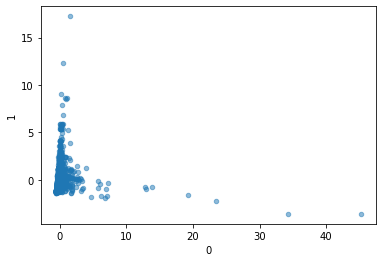

In [263]:
df_temp.plot(kind = 'scatter',x = 0,y = 1, alpha = 0.5)

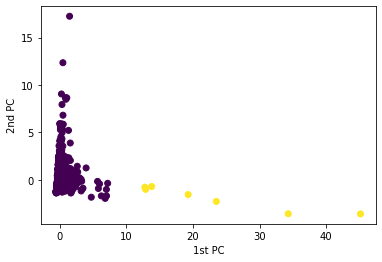

In [280]:
fig,ax = plt.subplots()

ax.scatter(df_temp[0], df_temp[1], c = df_temp['target'])
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

In [290]:
# most popular tweets 

In [294]:
df_original[df_temp['target'] == 1]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
183,1338287664454393858,Anita Anand,"Oakville, Ontario",MP for #Oakville & Minister of Public Services...,2012-02-01 13:38:10,8410,2228,10393,True,2020-12-14 01:00:18,Welcoming the 1st #COVID19vaccines to 🇨🇦 tonig...,"['COVID19vaccines', 'PfizerBioNTech']",Twitter for iPhone,284,1979,False
793,1340304234416381954,Senator Shehu Sani,Nigeria,Human Rights Activist | Author | PanAfricanist...,2010-02-24 10:39:37,1772291,2153,5272,True,2020-12-19 14:33:25,The Western media deliberately down played or ...,"['coronavirus', 'Pfizer']",Twitter for iPhone,115,750,False
922,1340456887817560065,The Epoch Times,"New York, USA","An independent, award-winning voice in print &...",2009-04-05 23:54:55,455202,90,28251,True,2020-12-20 00:40:01,The @US_FDA is investigating around 5 allergic...,NaN,Buffer,176,288,False
1561,1341064255378886657,Ramesh Bala,"Chennai, India",Entertainment Industry Tracker | Covers Hollyw...,2010-01-06 04:17:52,512759,675,52713,True,2020-12-21 16:53:28,"After #UK , #Canada and #US - now #Europe appr...","['UK', 'Canada', 'US', 'Europe', 'PfizerBioNTe...",Twitter Web App,51,1786,False
2192,1348068786587500547,Anita Anand,"Oakville, Ontario",MP for #Oakville & Minister of Public Services...,2012-02-01 13:38:10,8944,2256,10559,True,2021-01-10 00:46:59,🇨🇦 has received &amp; distributed over half a ...,"['PfizerBioNTech', 'Moderna']",Twitter for iPhone,147,508,False
2281,1347921247083122689,Chris Ship,"London, England",ITV NEWS Royal Editor. Tweeting the newsworthy...,2009-12-09 20:08:47,73560,1528,2091,True,2021-01-09 15:00:43,A Palace source said the vaccines were adminis...,NaN,Twitter for iPhone,194,1367,False
